The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


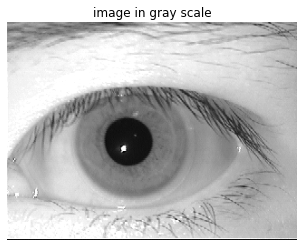

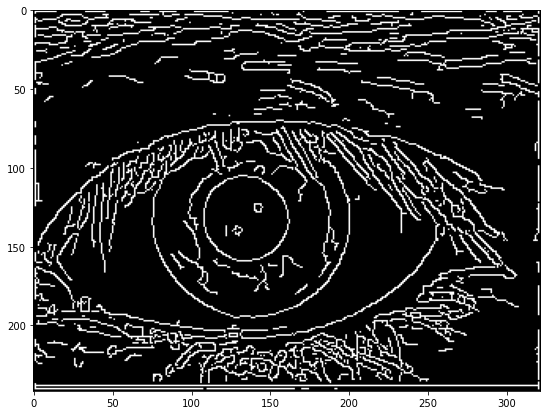

0.1 132 131 57


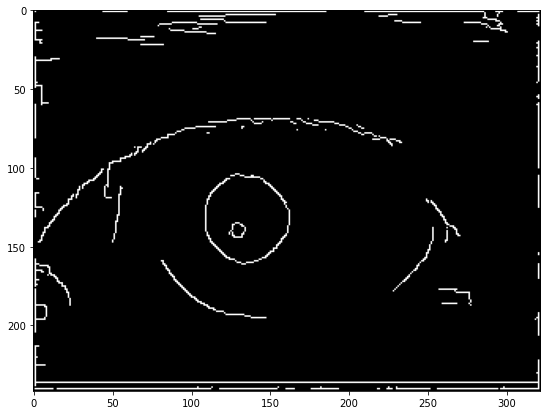

(<PIL.Image.Image image mode=RGB size=320x240 at 0x7F2A96C1F760>,
 [(131, 132, 26)])

In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import canny_edge_detector as canny
from sobel import show_images
import matplotlib.pyplot as plt 
import skimage.io as io
import os
from PIL import Image, ImageDraw
from math import sqrt, pi, cos, sin
from collections import defaultdict
import numpy as np
import cv2
IMG_PATH = 'images/kelvinl3.bmp'
def hought_transform(image,img,inner,rmin,rmax,steps,threshold):
    """
    This function applies the hough transform to an image.
    The function takes as input:
    - image: the image to be transformed
    - rmin: the minimum radius to be considered
    - rmax: the maximum radius to be considered
    - steps: the number of steps between rmin and rmax
    - threshold: the minimum number of votes that a line has to get in order to be considered
    """
    if not(inner) :
        output_image = Image.new("RGB", Image.open(IMG_PATH).size)
        output_image.paste(Image.open(IMG_PATH))
    else:
        output_image = Image.new("RGB", Image.open('images/hough_transform.bmp').size)
        output_image.paste(Image.open('images/hough_transform.bmp'))
    draw_result = ImageDraw.Draw(output_image)
    points=[]
    for r in (rmin,rmax+1):
        for t in range(steps):
            points.append((r,int(r*cos(2*pi*t/steps)),int(r*sin(2*pi*t/steps))))
    
    hough_space = defaultdict(int)
    for x, y in image:
        for r, dx, dy in points:
            a = x - dx
            b = y - dy
            hough_space[(a, b, r)] += 1
    circles=[]
    if not(inner):
        for k, v in sorted(hough_space.items(), key=lambda i: -i[1]):
            x, y, r = k
            if v / steps >= threshold and all((x - xc) * 2 + (y - yc) * 2 > rc ** 2 for xc, yc, rc in circles):
                print(v / steps, x, y, r)
                circles.append((x, y, r))
    else:
        circles.append((131,132,26))

    for x, y, r in circles:
        if not(inner):
            draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(255,0,0,0))
        else:
            draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(0,255,0,0))
    output_image.save('images/hough_transform.bmp')
    return (output_image,circles)

paths=[]
def load_data(dir_name = 'images'):    
    imgs = []
    for filename in os.listdir(dir_name):
        if os.path.isfile(dir_name + '/' + filename):
            img = io.imread(dir_name + '/' + filename)
            img = rgb2gray(img)
            imgs.append(img)
            paths.append(dir_name + '/' + filename)
    return imgs
def visualize(imgs, format=None, gray=False):
    plt.figure(figsize=(20, 40))
    for i, img in enumerate(imgs):
        if img.shape[0] == 3:
            img = img.transpose(1,2,0)
        plt_idx = i+1
        plt.subplot(2, 2, plt_idx)
        plt.imshow(img, format)
    plt.show()
# imgs = load_data()



img = io.imread(IMG_PATH)
# lower,upper = calculate_thresholds(img)
img = rgb2gray(img)
# lower = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY )[0]/3200
# upper = lower/3200+.0499
lower = .04
upper = .025
show_images([img], ['image in gray scale'])
    # apply automatic Canny edge detection using the computed median
detector = canny.cannyEdgeDetector([img], sigma=4, kernel_size=5, lowthreshold=lower, highthreshold=upper, weak_pixel=255, strong_pixel=40)
imgs_final,keep = detector.detect()
visualize(imgs_final, 'gray')
hough,circles = hought_transform(keep,IMG_PATH,False,rmin=57,rmax=58,steps=800,threshold=.002)
lower = .044
upper  = .064
detector = canny.cannyEdgeDetector([img], sigma=10, kernel_size=8, lowthreshold=lower, highthreshold=upper, weak_pixel=200, strong_pixel=10)
imgs_final,keep = detector.detect()
visualize(imgs_final, 'gray')
hought_transform(keep,hough,True,rmin=30,rmax=40,steps=8000,threshold=.0005)